Lesson 7: Manipulating Data and Files
=====

About files
-----------

In this Section we will learn how to write and read data to and from files using Python.

We can then use this data to do useful things like plotting or calculations.

To use a file it has to be opened, and when finished it has to be closed.  
While the file is open, it can either be read from or written to.  

To open a file, we specify its name and indicate whether we want to read or write.

## Files for Examples:

These examples and the ones later require us having some files to process, these are in the `Files` folder, so make sure you download the files in this if working on your own machine. 
* Make sure they are inside correctly named sub-folders on your hard disk.
* **Use the same capitalisation as the original for cross platform compatibility**. (Many operating systems are case sensitive).

### To find out where  a Jupyter Notebook is running run the following command:

In [9]:
import os

here = os.getcwd() #get location of Current Working Directory
print(here)

/jupyter/jupyter-nm268/sources


* You can then navigate to this folder using the file-browser on your operating system.

## Organising Folders

When we create a new file by opening it and writing, the new file goes
in the current working folder (also called a *"directory"*).  
When we open a file for reading, Python also looks for it in the
same place.

If we want to open a file somewhere else, we have to specify the
**path** to the file, which is the name of the directory (or folder)
where the file is located.

Usually we use *relative* paths, when we have a subfolder in the current working directory e.g.: `Files/Work/mynotes.txt`.  
The directory above is `../` etc.
* Use the same case (uppercase capitals etc.), which may not matter on Windows byt will affect the script on other operating systems and for marking the work.

A full (_"absolute"_) Windows path might be `"c:/Users/Nick/words.txt"` or
`"c:\\Users\\Nick\\words.txt"`, but **do NOT use these in shared or submitted files** only if you are ever going to use the script on a single machine.  
Because backslashes are used to escape things like newlines and tabs, we need to write two backslashes in a 
string to get a real backslash `\`, so can use a forward slash instead (like web addresses).

* We cannot use `/` or `\` as part of a filename; they are reserved as a
**delimiter** between directory and filenames.

Writing our First File
----------------------

To open a file we use the `open(NAME, MODE)` function, which takes two *arguments*.  
The first is the name of the file, and the second is called the **mode**.  
Mode `"w"` means that we are opening the file for **w**riting. 

With mode `"w"`, if there is no file named `test.txt` on the disk, it
will be created.  
If there already is one, it will be replaced by the
file we are writing (be careful to not overwrite important files!).

In [10]:
myfile = open("workfile.txt", "w")
print(myfile)

<_io.TextIOWrapper name='workfile.txt' mode='w' encoding='UTF-8'>


The variable named `myfile` acts like a *container* holding all the contents copied to memory from the file on disk.  
You can move information from the container a piece at  time, or all at once until it is empty.

You can then use different *methods* on the file, using a **dot** as in: `FILE`**.**`METHOD`, 
and this makes changes to the `myfile` container.

The following line writes text into a file, using the `write` method. The file is written to the current working folder where the programme script is run from (See Section below on **Using the OS Module} for more on working folders).

In [11]:
myfile.write("This is a test...")

17

* Try opening the new file from the main JupyterHub file menu or on your disk using the file browser. 
    - notice that it will be empty.
    - This is because you haven't yet saved the file to disk (like editing but not pressing **save** in a word processor).  

To send any data to the file before we are finished we can use the `flush` method. 

In [3]:
myfile.flush()

* Now try reopening the file to see if the contents have appeared.

Using the `close` method will both **save** the data *and* **close** the file.

To write something other than a string, it needs to be converted to a string first:

In [12]:
value = 42
s = str(value)
myfile.write(s)
myfile.close()

* Reopen the file and see the new contents.

Note: if you try to save something other than a string, or a variable that does not exist we will get an error.

### The `with` statement

A safe way of writing to files is using the `with` statement and an indented block of code that does something to the file.
This is safe because you do not need to specify `close()` at the end. The contents are written to the file whether the code exited normally or not. This means you do not lose any work in progress.

The general syntax for opening the file FILENAME and assigning it to a FILEHANDLE (`like FH=FN.open()`) is:
```python
with open(FILEMNAME, MODE) as FILEHANDLE:
    DO FUN STUFF
    FILEHANDLE.write()
    OTHER STUFF
    ...
```
* Note in the example below the "triple quotes" allow us to use a multi-line string.

In [13]:
textlines="""A bit of text I want to write to a file.
1. The first point I want to make is this.
2. Next I want to tell you that..."""

fname="outfile.txt"

with open(fname,"w") as f:
    f.write(textlines)

* Just to prove that the file has been written and closed properly, read its contents, which we will cover in the next subsection

In [14]:
print(open(fname,"r").read())

A bit of text I want to write to a file.
1. The first point I want to make is this.
2. Next I want to tell you that...


The `write` method can be used repeatedly to print more output to the file, as
shown in lines 2, 3 and 4 below.  
In bigger programs, lines 2-4 will usually be replaced by a loop that writes many more lines into the file.

In [1]:
with open("test.txt", "w") as mynewfile:
    mynewfile.write("# A bit of text I want to write to a file.")
    mynewfile.write("1. The first point I want to make is this.")
    mynewfile.write("2. Next I want to tell you that...")

* Now look in your working folder and you will be able to open the new file **test.txt**.  
    - You will notice that the text is all on one line. This is because we didn't tell Python to start a new line.  
    * We do this using the *special* character `"\n"` (backslash n), which stands for "newline". 
    - This is like pressing **enter** or **return** on the keyboard. Other special characters exist, such as `"\t"` for **tab**.

* **Exercise:** Try again, but putting a `\n` inside the end of each string

In [17]:
#with opener
### BEGIN SOLUTION
with open("test.txt", "w") as mynewfile:
### END SOLUTION
    ### BEGIN SOLUTION
    mynewfile.write("# A bit of text I want to write to a file.\n")
    ### END SOLUTION
    ### BEGIN SOLUTION
    mynewfile.write("1. The first point I want to make is this.\n")
    ### END SOLUTION
    ### BEGIN SOLUTION
    mynewfile.write("2. Next I want to tell you that...\n")
    ### END SOLUTION

Now reload the file in a browser to see it.

It should look like this:
```
# A bit of text I want to write to a file.
1. The first point I want to make is this.
2. Next I want to tell you that...
```

[Click here for solution](solutions/sol0701.ipynb)

* **You will need the correct code run above for the following exercises to work!**

## Reading from Files

If a file exists on our disk, we can open it for reading.  
This time, the mode argument is `"r"` for **r**ead:

In [12]:
thefile = open("test.txt", "r")
print(thefile)

<_io.TextIOWrapper name='test.txt' mode='r' encoding='UTF-8'>


* This returns the contents of the file in a *"container"* object.

However, if we try to open a file for reading that doesn't exist, we get an error:

In [10]:
anotherfile = open("iamnotafile.txt", "r")

FileNotFoundError: [Errno 2] No such file or directory: 'iamnotafile.txt'

We can write some code to catch errors and prevent them from raising an error message (a so called *"exception"*).

In [18]:
# This checks that the expected error is raised and raises an exception
fname = "iamnotafile.txt"

try: open(fname, "r")
except: print(f'File "{fname}" could not be opened.')

File "iamnotafile.txt" could not be opened.


## File Methods

There are a variety of methods for reading data and text from files, depending on the format of the data and how we want to use it. 
We can either read the contents of the whole file at once, or scan it in line-by-line.

### Reading the Whole File

The `read` method returns the entire contents of the file, emptying the whole "container" into the string called `this` at the same time:

In [19]:
thefile = open("test.txt", "r")
this = thefile.read()
print(this)

# A bit of text I want to write to a file.
1. The first point I want to make is this.
2. Next I want to tell you that...



If we try to read it a second time, the file *container* called `thefile` is now empty, so will return an empty string:

In [20]:
that = thefile.read()
print(that)

### Reading Files a Line at a Time

Another file method is `readline`, which scans the contents line-by-line: 

In [28]:
f = open("test.txt", "r")
print(0, f.readline())  # This will read the first line of the file.
print(1, f.readline())  # and next the second line
print(2, f.readline())  # and the last line
print(3, f.readline())  # the handle (container) is now empty...

0 # A bit of text I want to write to a file.

1 1. The first point I want to make is this.

2 2. Next I want to tell you that...

3 


The `end=""` argument prevents an extra newline being added:

In [27]:
f = open("test.txt", "r")
print(0, f.readline(), end="")  # This will read the first line of the file.
print(1, f.readline(), end="")  # and next the second line
print(2, f.readline(), end="")  # and the last line
print(3, f.readline(), end="")  # the handle (container) is now empty...

0 # A bit of text I want to write to a file.
1 1. The first point I want to make is this.
2 2. Next I want to tell you that...
3 

### Iterative Methods for Scanning Files

A file can also be iterated over in the same way as a list.

* **Exercise:** Put the previous code in a loop using `for i in range(3):` and changing the numbers for the counter `i`

In [29]:
# open the file
### BEGIN SOLUTION
myfile = open("test.txt", "r")
### END SOLUTION
#FOR loop condition:
### BEGIN SOLUTION
for i in range(3):
### END SOLUTION
    #single print function
    ### BEGIN SOLUTION
    print(i, myfile.readline(), end="")
    ### END SOLUTION
#end of loop

0 # A bit of text I want to write to a file.
1 1. The first point I want to make is this.
2 2. Next I want to tell you that...


[Click for solution](solutions/sol0702.ipynb)


Alternatively you can just iterate over the file contents directly:

In [ ]:
the_file = open("test.txt", "r")

for each_line in the_file:
    print(each_line, end="")

Reading a File in to a List of Lines
-----------------------------------

It is often useful to fetch data from a disk file and turn it into a
list of lines.  
We can then perform useful tasks on this list.   
The `readlines` method in line 2 reads all the lines and returns a list
of the strings.  

In [31]:
f = open("test.txt", "r")
list_of_lines = f.readlines()
print(list_of_lines)

['# A bit of text I want to write to a file.\n', '1. The first point I want to make is this.\n', '2. Next I want to tell you that...\n']


In [32]:
print("The last line is:\n", list_of_lines[-1])

The last line is:
 2. Next I want to tell you that...



### Sorting a File

This example sorts the lines of a file alphabetically (with capitalised words first).  
We will use the `friends.txt` file we downloaded, which has a name per line.  
* Take a look at this file using a normal text editor.  

First we read everything into a list of lines, then sort the list, and then write the sorted list back
to another file:

In [37]:
thefile = open("Files/friends.txt", "r")
contentlist = thefile.readlines()
thefile.close()

print(contentlist)

['Loonquawl\n', 'Grunthos the Flatulent\n', 'Hillman Hunter\n', 'Effrafax of Wug\n', 'Arthur Philip Deodat\n', 'Oolon Colluphid\n', 'Fook\n', 'Lintilla\n', 'Barman of the Horse and Groom\n', 'Dan Streetmentioner\n', 'Genghis Khan\n', 'Arthur Dent\n', 'Humma Kavula\n', 'Paula Nancy Millstone Jennings\n', 'Gail Andrews\n', 'Fenchurch\n', 'Eddie the Computer\n', 'Marvin the Paranoid Android\n', 'Prak\n', 'Random Dent\n', 'Pizpot Gargravarr\n', 'Prostetnic Vogon Jeltz\n', 'Deep Thought\n', 'Lunkwill\n', 'Trin Tragula\n', 'Colin the Security Robot\n', 'Eccentrica Gallumbits\n', 'Wonko the Sane\n', 'Phouchg\n', 'Ford Prefect\n', 'Yooden Vranx\n', 'Prostetnic Vogon Kwaltz\n', 'Mella\n', 'Trillian Astra\n', 'Roosta\n', 'Elvis Presley\n', 'Slartibartfast\n', 'Emily Saunders\n', 'Zaphod Beeblebrox\n', 'JinJenz\n', 'Rob McKenna\n', 'Zarquon\n', 'Charles Darwin\n', 'Bowerick Wowbagger\n', 'Barry Manilow\n', 'Phouchg\n', 'Galaxia Woonbeam\n', 'Max Quordlepleen\n', 'Garkbit\n', 'Frankie Mouse\n', 'A

Now we can sort the list alphanumerically:

In [42]:
contentlist.sort()  # sort is a list method, guess what it does before running this cell
list(contentlist) # spot the difference!

['Agda\n',
 'Agrajag\n',
 'Arthur Dent\n',
 'Arthur Philip Deodat\n',
 'Barman of the Horse and Groom\n',
 'Barry Manilow\n',
 'Benjy Mouse\n',
 'Bowerick Wowbagger\n',
 'Charles Darwin\n',
 'Colin the Security Robot\n',
 'Dan Streetmentioner\n',
 'Deep Thought\n',
 'Eccentrica Gallumbits\n',
 'Eddie the Computer\n',
 'Effrafax of Wug\n',
 'Elvis Presley\n',
 'Emily Saunders\n',
 'Fenchurch\n',
 'Fook\n',
 'Ford Prefect\n',
 'Frankie Mouse\n',
 'Gag Halfrunt\n',
 'Gail Andrews\n',
 'Galaxia Woonbeam\n',
 'Garkbit\n',
 'Genghis Khan\n',
 'Grunthos the Flatulent\n',
 'Hillman Hunter\n',
 'Hotblack Desiato\n',
 'Humma Kavula\n',
 'JinJenz\n',
 'Lintilla\n',
 'Loonquawl\n',
 'Lunkwill\n',
 'Marvin the Paranoid Android\n',
 'Max Quordlepleen\n',
 'Mella\n',
 'Oolon Colluphid\n',
 'Pasta Fasta\n',
 'Paula Nancy Millstone Jennings\n',
 'Phouchg\n',
 'Phouchg\n',
 'Pizpot Gargravarr\n',
 'Prak\n',
 'Prosser\n',
 'Prostetnic Vogon Jeltz\n',
 'Prostetnic Vogon Kwaltz\n',
 'Questular Rontok\n',
 

Now write back to another file:

In [43]:
with open("sortedfriends.txt", "w") as outfile:
    for next_entry in contentlist:
        outfile.write(next_entry)

* Open the file using the browser to see its contents.

### Exercise: File Reversing

Write a program that reads a file and writes out a new file with the lines in reversed order (i.e. the first line in the old file becomes the last one in the new file.)
* Hint: use reverse indexing using: 
```python
range(-1,-N,-1)
```

In [48]:
#open the input file
### BEGIN SOLUTION
oldfile = open("sortedfriends.txt", "r")
### END SOLUTION

# read into a list (called contents) using readlines
### BEGIN SOLUTION
contents = oldfile.readlines()
### END SOLUTION

N = len(contents) # may be needed later...

# open your new file to write to, using a WITH statement:
### BEGIN SOLUTION
with open("backwardsfriends.txt", "w") as newfile:
### END SOLUTION
    ## EVERYTHING INDENTED IN THE WITH BLOCK ##
    # loop backwards FOR the LENgth of the contents list obtained above
    ### BEGIN SOLUTION
    for i in range(-1, -N, -1):
    ### END SOLUTION
        # write lines back to your file 
        ### BEGIN SOLUTION
        newfile.write(contents[i])
        ### END SOLUTION
    ## END OF THE WITH BLOCK ##

[Click for solution](solutions/sol0703.ipynb)

### Filtering a File

Many useful line-processing programs will read a text file
line-at-a-time and do some minor processing as they write the lines to
an output file. They might number the lines in the output file, or
insert extra blank lines after every 60 lines to make it convenient for
printing on sheets of paper, or extract some specific columns only from
each line in the source file, or only print lines that contain a
specific substring.  
We call this kind of program a **filter**.

Here is a filter that copies one file to another, omitting any lines
that begin with `#`. 

* Have a look at the contents of the file `Files/intext.txt` to see what it looks like before running the next cell.

In [49]:
oldfilename = "Files/intext.txt"
newfilename = "outtext.txt"

infile = open(oldfilename, "r")

with open(newfilename, "w") as outfile:
    for text in infile:
        if text[0] != "#":
            outfile.write(text)
    outfile.close()

* Look at `outtext.txt` to see what this did to the data.

Methods such as sorting and filtering are also very useful on numerical data.

## Manipulating Numerical Data

Numerical data can be read in, processed and written to files in the same way as text.  
Instead of using text methods we simply perform mathematical operation on the numbers.

### Import of data using NumPy

Numerical data manipulation is made easier by importing and using the numerical module NumPy.  
NumPy also has special methods for saving and loading purely numerical array data to and from files.

The following programme loads a column of text from the file `"temps.txt"` into an array using the `ARRAY=np.loadtxt(FILENAME)` method.

In [15]:
import numpy as np

data = np.loadtxt("Files/temps.txt")

print(data)

[ 2.5  5.7  7.9  8.7  8.9  8.8  8.9  8.7  8.5  8.5  8.3  8.3  8.5  9.
  9.6 10.4 11.4 11.6 11.8 11.9 11.5 11.7 11.4 11.2 11.6 11.1 11.1 12.
 12.  12.  11.2 10.1  9.6  9.7  8.7  8.3  7.9  7.7  8.4  7.3  6.6  5.2
  5.7  5.6  5.5  6.9  7.   7.   7.1  7.9  8.2  8.3  8.7  8.7  8.5  8.6
  8.8  5.6  4.9  4.1  3.7  3.9  4.   3.3  4.4  4.7  3.9  2.4  1.8  3.
  3.1  3.1  5.3  6.2  5.2  5.7  6.4  6.5  5.5  5.   4.2  2.5  3.   3.
  2.7  2.4  2.6  3.   4.4  6.6  6.8  7.5  8.1  8.   8.   8.5  6.8  8.5
  8.6  8.9  8.1  8.2  6.7  3.7  3.6  4.1  4.7  4.6  4.6  4.9  4.8  4.8
  4.9  5.   5.2  5.   4.3  3.9  3.7  4.   5.2  6.2  7.4  7.8  7.8  7.4
  6.9  7.4  7.6  8.1  8.1  8.   7.5  7.6  7.7  7.4  7.7  8.3  8.3  6.7
  6.3  6.   5.4  5.   5.7  6.8  7.5  7.9  8.   7.4  7.7  5.9  6.8  6.5
  5.9  5.8  6.1  6.2  5.9  5.9  4.5  4.1  4.2  5.2  4.7  5.4  5.   5.8]


We can then take the *mean* (average) and standard deviation of the data using the `.mean()` function:

In [16]:
help(np.mean)

Help on function mean in module numpy:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs,

In [17]:
m = data.mean()
s = data.std()

print(f"mean = {m:.1f}, standard deviation = {s :.1f}")

mean = 6.8, standard deviation = 2.4


### Export of Data using Numpy

Continuing the last example we will now: 

1. Calculate the the difference of the individual temperature values from the mean.
2. Save these to a new file using the `np.savetxt(FILENAME, DATA)` method.

In [27]:
devs = data-m # a new array with the differences
print(devs) #print the array
np.savetxt("deviations.txt", devs)

[-4.27380952 -1.07380952  1.12619048  1.92619048  2.12619048  2.02619048
  2.12619048  1.92619048  1.72619048  1.72619048  1.52619048  1.52619048
  1.72619048  2.22619048  2.82619048  3.62619048  4.62619048  4.82619048
  5.02619048  5.12619048  4.72619048  4.92619048  4.62619048  4.42619048
  4.82619048  4.32619048  4.32619048  5.22619048  5.22619048  5.22619048
  4.42619048  3.32619048  2.82619048  2.92619048  1.92619048  1.52619048
  1.12619048  0.92619048  1.62619048  0.52619048 -0.17380952 -1.57380952
 -1.07380952 -1.17380952 -1.27380952  0.12619048  0.22619048  0.22619048
  0.32619048  1.12619048  1.42619048  1.52619048  1.92619048  1.92619048
  1.72619048  1.82619048  2.02619048 -1.17380952 -1.87380952 -2.67380952
 -3.07380952 -2.87380952 -2.77380952 -3.47380952 -2.37380952 -2.07380952
 -2.87380952 -4.37380952 -4.97380952 -3.77380952 -3.67380952 -3.67380952
 -1.47380952 -0.57380952 -1.57380952 -1.07380952 -0.37380952 -0.27380952
 -1.27380952 -1.77380952 -2.57380952 -4.27380952 -3

* Look at the contents of the file from the file browser.


### Manipulating CSV files

Numerical columns of data are commonly sored as *Comma Separated Value* files with a `.csv` extension

The file `Files/weatherdata.csv` contains hourly weather data in plain text, with values separated by commas (or other so called *"delimiters"*).  

The file looks like this in a plain text editor:
```
Dry Bulb Temperature {C}, Dew Point Temperature {C}, Relative Humidity {%}, ...
2.50E+0, 1.2, 91, ...
5.70E+0, 3.5, 86, ...
7.90E+0, 4.7, 80, ...
... , ... , ...,
```
But when opened in Excel appears as a table like this:

|Dry Bulb Temperature {C} |	Dew Point Temperature {C} |	Relative Humidity {%} | ... |
|-|-|-|-|
|2.5 | 1.2 | 91 | ... |
|5.7 | 3.5 | 86	| ... |
|7.9 | 4.7 | 80	| ... |
|8.7 | 5.6 | 81	| ... |
|8.9 | 5.8 | 81	| ... |
| ...| ... | ...| ... |


The `np.loadtxt()` function method can read the values into a data array by telling `.loadtxt` how the data is laid out in the `.csv` file.
* The *keyword argument* `delimiter=<SOME_STRING>` tells numpy how the data is separated (without this option it assumes a space).  
* The keyword argument  `skiprows=1` is used to ignore the first row, which is the non-numerical header.

In [11]:
import numpy as np

# delimiter=',' tells .loadtxt that the values are separated with commas (rather than spaces)
filedata = np.loadtxt("Files/weatherdata.csv", delimiter=",", skiprows=1)

print(filedata) #will show only the head (top rows) and tail (bottom rows) of a long array

[[ 2.5  1.2 91.  ...  0.   0.   0. ]
 [ 5.7  3.5 86.  ...  0.   0.   0. ]
 [ 7.9  4.7 80.  ...  0.   0.   0. ]
 ...
 [ 6.7  3.4 79.  ...  0.   0.   0. ]
 [ 5.7  2.8 82.  ...  0.   0.   0. ]
 [ 4.3  2.  85.  ...  0.   0.   0. ]]


Each row is an hour's weather data, with the temperatures in the first column.

### Slicing data from an array

Numpy arrays can be sliced using `ARRAYNAME[<STARTROW>:<ENDROW>, <STARTCOL>:<ENDCOL>]` for example:
* Taking the value in the 1st row (`i=0`) and third column (`j=2`):
```python
filedata[0, 2]
```
```91.0```


* Taking the value in the second row (`i=1`), from the second (`j=1`) to third (`j=2`) column:
```python
filedata[1, 1:3] #note the end position is not included
```
```array([ 3.5, 86. ])```


* Values before the fourth column (`j=3`) in the last row:
```python
filedata[-1, :3]
```
```array([ 4.3,  2. , 85. ])```


* the entire second column (`i=1`):
```python
filedata[:, 1]
```
```array([1.2, 3.5, 4.7, ..., 3.4, 2.8, 2. ])```



* Note that an empty value in a `A:B` specifier takes value to the **end** of the row or column.
---
### Example: Calculating the average temperature:

In [29]:
import numpy as np

filedata = np.loadtxt("Files/weatherdata.csv", delimiter=",", skiprows=1)
temperatures = filedata[:, 0] # take the first (temperature) column

average = temperatures.mean()
print(f"Average temperature: {average:.2f} degrees C")

Average temperature: 10.25 degrees C


### Saving Numerical Only Data  

We can instead write the output to a file using `np.savetxt(FILENAME, DATA, <keyword=options>)` using the keyword options:

* `delimiter = ","` to use commas in the `.csv` file (if there are multiple columns)
* `fmt="%.2f"` to format the numbers as `floats` with **2** decimal places (similar to the `format` method above).

In [30]:
np.savetxt("temperatures.csv", temperatures, delimiter = ",", fmt="%.1f")

The file contents look like this:
```
2.5
5.7
7.9
.
.
.
```

* Download it and open it in Excel

### Exercise: Deviations from the average.

1. Load the weather data from the file.
2. Slice out the first column of temperatures.
3. Take the average value of the temperatures.
4. Subtract the average value from the temperatures array to give the deviations ($d = T - \mu(T)$)
5. Save this back to a file called `"deviations.csv"` with `1dp` floating point precision 

In [31]:
import numpy as np

# load the weather file
### BEGIN SOLUTION
filedata = np.loadtxt("Files/weatherdata.csv", delimiter=",", skiprows=1)
### END SOLUTION

# slice column 0
### BEGIN SOLUTION
temperatures = filedata[:, 0] 
### END SOLUTION

# obtain the mean
### BEGIN SOLUTION
average = temperatures.mean()
### END SOLUTION

# calculate the deviations
### BEGIN SOLUTION
deviations = temperatures - average
### END SOLUTION

# save back to a CSV text file
### BEGIN SOLUTION
np.savetxt("deviations.csv", deviations, delimiter = ",", fmt="%.1f")
### END SOLUTION


* Opening the file should have the contents:

```
-7.7
-4.5
-2.3
...

```

[Click for solution](solutions/sol0704.ipynb)

## Processing Multiple Files

Scripts can allow you to process many files in one go. You can split up a single file into many, join data from lots of files into one place or plot data to  a range of figures in one go. 

### Using the `os` module.

A nice module for working with our Operating System is the `os` module.  
This allows us to see/change our current working location as well as make new folders.  
To view your *current working directory* use the `.getcwd` function method:

In [32]:
import os
myWD = os.getcwd()

print(myWD)

/jupyter/jupyter-nm268/sources


The method `.listdir(FOLDER)` allows us to list the contents of a directory (FOLDER).

* Note that when referring to the current folder we can use the string `"."` and the one above we can use `".."` 

Try the following command:

In [65]:
contents = os.listdir(myWD)  # lists the contents of the working directory
print(contents)

['Programming for Civil Engineers in Python (AR10366).zip', '.ipynb_checkpoints', '08. 2D Arrays and Pandas.ipynb', '09. Debugging Code.ipynb', '10. Writing Programs.ipynb', 'Figures', 'Files', 'mytools.py', 'my_module.py', 'my_module2.py', '.library.json', 'config', 'images', 'code', 'data', '.gitignore', 'nbplain', 'workfile.txt', 'outfile.txt', 'test.txt', 'nbfancy', 'solutions', '01-Python_Basics.ipynb', '04-If_and_While.ipynb', '05-Lists_and_Loops.ipynb', '__pycache__', '.checks', 'checks', 'PlotLy.ipynb', '00-Summary.ipynb', '03-Functions-v2.ipynb', '02-Strings_and_Variables-v4.ipynb', '06-Plotting_Arrays.ipynb', 'LOOK_AT_ME.png', 'more_sinusoids.png', 'subplot1.png', 'subplot_from_list.png', 'subplot2.png', 'histogram.png', 'fname.png', 'task6_plot.png', '07-Data_and_Files.ipynb', 'sortedfriends.txt', 'backwardsfriends.txt', 'outtext.txt', 'deviations.txt', 'devs.csv', 'temperatures.csv', 'text.csv', 'deviations.csv', 'Weather2', 'Weather', 'weekly_temperatures.png']


In [34]:
os.listdir("Files") # this will only work if the `Files` folder exists

['alice_in_wonderland.txt',
 'Case Study Data.xlsx',
 'flatland.txt',
 'friends.txt',
 'houseenergy.csv',
 'intext.txt',
 'outtext.txt',
 'temps.txt',
 'weatherdata.csv',
 '.ipynb_checkpoints']

* the `os.mkdir(<FOLDERNAME>)` tries to create a new directory named whatever string you replace `<FOLDERNAME>` with.
* We use `try:` and `except:` to catch and ignore any errors such as the folder already existing.

#### Weekly Weather files:

In [58]:
import numpy as np
import os

filedata = np.loadtxt("Files/weatherdata.csv", delimiter=",", skiprows=1)
temperatures = filedata[:, 0]

folder = "Weather/"
try: os.mkdir(folder) # try to make the new folder if it doesn't exist
except: pass # if the folder already exists move on

hours_per_week = 24*7

# count for 52 weeks:
for i in range(52):
    start_hour = i*hours_per_week #takes values: 0, hours_per_week, 2*hours_per_week, ...
    end_hour = start_hour + hours_per_week
    weekly_temperatures = temperatures[start_hour:end_hour] #slice out the hours for that week
    
    # make a two digit week number 01, 02, 03, ..., 50, 51, 52
    week_number = i+1
    week_string = str(week_number).zfill(2) # fill with leading zeros to make all two digits
    
    # create a new file
    newfilename = f"temp_week{week_string}.txt"
    filepath = folder+newfilename
    np.savetxt(filepath, weekly_temperatures, fmt="%.1f")

The [Weather](Weather) folder should now contain 52 files, each with a week's worth of hourly temperature data as a single column. 

In [59]:
wfiles = os.listdir("Weather")
print(wfiles)

['temp_week01.txt', 'temp_week02.txt', 'temp_week03.txt', 'temp_week04.txt', 'temp_week05.txt', 'temp_week06.txt', 'temp_week07.txt', 'temp_week08.txt', 'temp_week09.txt', 'temp_week10.txt', 'temp_week11.txt', 'temp_week12.txt', 'temp_week13.txt', 'temp_week14.txt', 'temp_week15.txt', 'temp_week16.txt', 'temp_week17.txt', 'temp_week18.txt', 'temp_week19.txt', 'temp_week20.txt', 'temp_week21.txt', 'temp_week22.txt', 'temp_week23.txt', 'temp_week24.txt', 'temp_week25.txt', 'temp_week26.txt', 'temp_week27.txt', 'temp_week28.txt', 'temp_week29.txt', 'temp_week30.txt', 'temp_week31.txt', 'temp_week32.txt', 'temp_week33.txt', 'temp_week34.txt', 'temp_week35.txt', 'temp_week36.txt', 'temp_week37.txt', 'temp_week38.txt', 'temp_week39.txt', 'temp_week40.txt', 'temp_week41.txt', 'temp_week42.txt', 'temp_week43.txt', 'temp_week44.txt', 'temp_week45.txt', 'temp_week46.txt', 'temp_week47.txt', 'temp_week48.txt', 'temp_week49.txt', 'temp_week50.txt', 'temp_week51.txt', 'temp_week52.txt']



# Task 7: File Manipulation (2%)

For this task you will read in a CSV energy file and produce a new file of daily totals.

* **Use previous examples** to guide you in solving the various parts of solving this problem. 
* Take it **step by step**. Do the first step and check it works before doing anything else and so on.
* Use lots of `print()` functions when developing your code, but remove them in the final version.

### Task: Energy Data

The data in the file: `Files/houseenergy.csv` is in the following format:

|month | day | hour | elec | gas |
|  -   |  -  |  -   |  -   |  -  |
|  1   |  1  |   1  |   0  |0.746| 
|  1   |  1  |   2  |   0  |0.672|
|  1   |  1  |   3  |   0  |0.075|

For the task you must do the following:
1. Load the numerical data into a Numpy array 
    * Make sure you load the file from a folder called `Files` with an uppercase `F` or it **will fail** on the grading server.
2. Slice out the columns for Electricity and Gas
3. Add them together to work out the total energy each hour
4. Open a file to write the new data to
5. Work out the hourly totals for each day (use a similar method as in [the weekly weather example](#Weekly-Weather-files:))
6. Sum them to give the total energy for that day
7. Write this sum to a line of the outfile inside the for loop, using syntax like:

```python
outfile = ??? # open the outfile to write 

for day in range(365):
    start_hour = ???
    end_hour = ???
    daily_energy = ???
    ??? # write the daily_energy to the outfile
    
???  # close the outfile
    
```
Or alternatively:
```python
???: # use the WITH method to open the outfile
    for day in range(365):
        start_hour = ???
        end_hour = ???
        daily_energy = ???
        ??? # write the daily_energy to the outfile
```

* You will need to format the lines properly to have a new line after each value.

The plain text file `"energy_totals.txt"` should contain simple numerical lines like:
```
81.121
79.466
108.238
...
```
* Note: this is rounded to 3 d.p.
* There should be nothing but a column of numbers 
    * no commas, no text, no units...
* Hint: you will need to use the newline specifier "\n" when writing lines individually.

In [1]:
import numpy as np

# Import file to data array
### BEGIN SOLUTION
data = np.loadtxt("Files/houseenergy.csv", delimiter=",", skiprows=1)
### END SOLUTION

# Slice out the columns for Electricity and Gas
### BEGIN SOLUTION
elec = data[:, 3]
gas = data[:, 4]
### END SOLUTION

# Add them together to work out the total energy each hour
### BEGIN SOLUTION
total = elec + gas
### END SOLUTION

# open an outfile 
    # for each day of the year
    #   work out the hourly totals for each day
    #   sum them to get the daily total
    #   writing each day's single total one per line
### BEGIN SOLUTION 
with open("energy_totals.txt", "w") as outfile:
    for day in range(365):
        start = day*24
        end = start+24
        daytotals = total[start:end]
        sumday = sum(daytotals)
        outfile.write(f"{sumday:.3f}\n")
### END SOLUTION

FileNotFoundError: [Errno 2] No such file or directory: 'c:/Files/houseenergy.csv'

#### The script below checks if your code has produced the desired output file  and its contents are as expected.

In [2]:
import sys
sys.path.append(".checks")
import check07
    
try: student_file = np.loadtxt("energy_totals.txt")
except OSError as e: print(e, 
    "\nDid you save the data to the correct file in the current working folder?")
except: pass

check07.test()

The file contents look correct!


```







```
---

## Extra Example: Plotting Data from a Set of Files

### 1. Plotting a figure for each file

* study the code below and try to understand what is happening on each line.

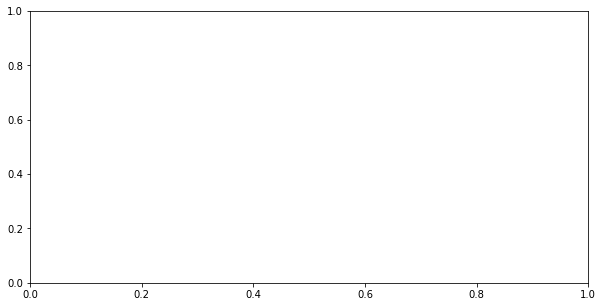

In [2]:
import os, matplotlib.pyplot as plt, numpy as np

dirname = "Weather/"
file_list = os.listdir(dirname)

try: os.mkdir("WeatherFigs")
except: pass

fig,ax = plt.subplots(figsize=(10,5))
for file_name in sorted(file_list):
    data = np.loadtxt(dirname+file_name)
    ax.plot(data)
    ax.set_xlabel("Time (h)")
    ax.set_ylabel("Temperature ($^\circ$C)")
    figname = file_name.replace(".txt", ".png")
    fig.savefig("WeatherFigs/"+figname)
    ax.cla() # clear the axis content to start a new graph

* Now look in the new `WeatherFigs` folder to see the image files.

### 2. Collecting data from many files into one figure

First we will get the data from all the files created earlier and put each week's average into a new list (the example continues below):

In [3]:
import os
import numpy as np

dirname = "Weather/"
file_list = os.listdir(dirname)
avdata = []

# sort the file list so the weeks are in order (needed later)
for file_name in sorted(file_list):
    weekdata = np.loadtxt(dirname+file_name)
    av = np.mean(weekdata)
    avdata.append(av)

print(avdata)

[6.773809523809524, 4.580357142857143, 5.0625, 2.651190476190476, 3.7035714285714287, 4.313095238095238, 2.279761904761905, 2.5011904761904766, 4.770833333333333, 6.919047619047619, 7.658333333333333, 8.873809523809523, 6.644642857142857, 7.667261904761904, 7.029761904761905, 11.420833333333333, 7.238095238095238, 12.057738095238095, 10.033333333333333, 14.345238095238095, 12.109523809523811, 14.296428571428573, 12.897023809523809, 12.427380952380954, 16.179761904761904, 18.90952380952381, 16.567261904761907, 17.836904761904762, 17.43214285714286, 18.3875, 17.086904761904766, 16.60238095238095, 18.951785714285716, 16.110119047619047, 14.61547619047619, 15.639880952380953, 12.813690476190475, 12.217261904761905, 13.538095238095236, 13.351785714285715, 9.116666666666667, 12.263095238095238, 7.802380952380952, 7.760119047619048, 8.176785714285714, 7.526785714285714, 8.594642857142858, 5.3863095238095235, 3.4291666666666663, 2.7625000000000006, 7.881547619047619, 7.8898809523809526]


Continued... Next we:

1. Calculate the average over the whole year (the average of all week's averages).
2. Loop through each week looking if they are above or below the yearly average, and then
3. Plot them as red points if hotter and blue points if colder. 

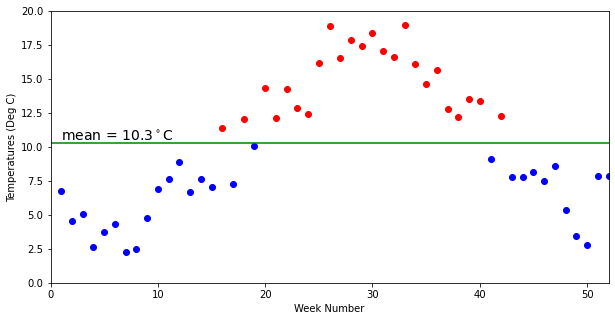

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

yearav = np.mean(avdata)

wnum = 0  # counter for week number
for weekav in avdata:
    wnum = wnum + 1
    if weekav >= yearav:
        #plot in red
        ax.plot(wnum, weekav, "ro")
    else:
        #plot in blue
        ax.plot(wnum, weekav, "bo")
        
#add some formatting and an average line then save figure
textstring = f"mean = {yearav:.1f}$^\circ$C"
ax.text(1, yearav+0.2, textstring, size=14)
xpts = [0, 52]  # two points for x values for the average line
ypts = [yearav, yearav]  # two points for y values for the average
ax.plot(xpts, ypts, "g-")  # plot the average line in green
ax.axis([0, 52, 0, 20])
ax.set_xlabel("Week Number")
ax.set_ylabel("Temperatures (Deg C)")
fig.savefig("weekly_temperatures.png")
fig.show()